In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
os.chdir('E:/Practical Time Series')

In [3]:
beer_df = pd.read_csv('datasets/quarterly-beer-production-in-aus-March 1956-June 1994.csv')

In [4]:
print('Shape of the dataframe:', beer_df.shape)

Shape of the dataframe: (155, 2)


In [5]:
beer_df.head()

,Quarter,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


In [6]:
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994': 'Beer_Prod'
                       },
               inplace=True
              )

In [7]:
beer_df.head()

,Quarter,Beer_Prod
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


In [8]:
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Number of rows with at least one missing values:', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)

Number of rows with at least one missing values: 1
Shape after removing missing values: (154, 2)


In [9]:
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]]
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat

In [10]:
beer_df['DEF00'] = double_exp_smoothing(beer_df['Beer_Prod'],0, 0)
beer_df['DEF01'] = double_exp_smoothing(beer_df['Beer_Prod'],0, 1)
beer_df['DEF10'] = double_exp_smoothing(beer_df['Beer_Prod'],1, 0)
beer_df['DEF11'] = double_exp_smoothing(beer_df['Beer_Prod'],1, 1)

Text(0.5,1,'TES: alpha=1, beta=0')

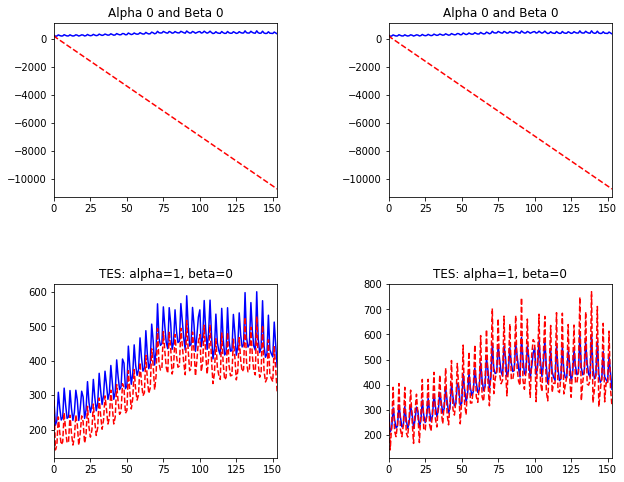

In [11]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(2,2,1)
beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=ax)
beer_df['DEF00'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('Alpha 0 and Beta 0')

ax = fig.add_subplot(2,2,2)
beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=ax)
beer_df['DEF01'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('Alpha 0 and Beta 0')

ax = fig.add_subplot(2,2,3)
beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=ax)
beer_df['DEF10'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=0')

ax = fig.add_subplot(2,2,4)
beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=ax)
beer_df['DEF11'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=0')

In [12]:
beer_df['DEF'] = double_exp_smoothing(beer_df['Beer_Prod'], 0.4, 0.7)

Text(0.5,1,'Double Smoothing Forecast')

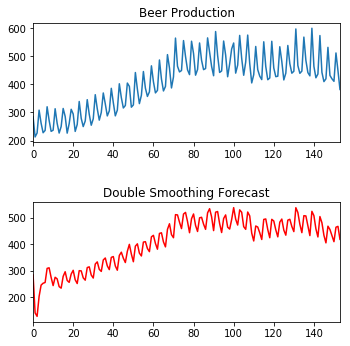

In [13]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
fig.subplots_adjust(hspace=.5)
beer_df['Beer_Prod'].plot(ax=ax)
ax.set_title('Beer Production')
ax = fig.add_subplot(2,1,2)
beer_df['DEF'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')

In [14]:
def single_exp_smoothing(x, alpha):
    F = [x[0]]
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F
beer_df['Single_Exponential_Forecast'] = single_exp_smoothing(beer_df['Beer_Prod'], 0.4)

Text(0.5,1,'Double Smoothing Forecast')

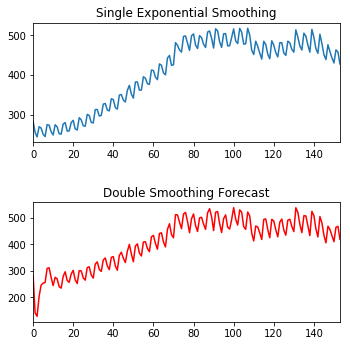

In [15]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
fig.subplots_adjust(hspace=.5)
beer_df['Single_Exponential_Forecast'].plot(ax=ax)
ax.set_title('Single Exponential Smoothing')
ax = fig.add_subplot(2,1,2)
beer_df['DEF'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')

Text(0.5,1,'Actual Vs Single Smoothing Forecasting')

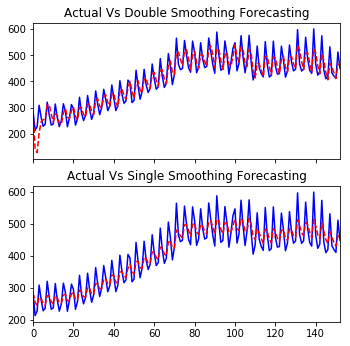

In [16]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[0])
beer_df['DEF'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Actual Vs Double Smoothing Forecasting')

beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[1])
beer_df['Single_Exponential_Forecast'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Actual Vs Single Smoothing Forecasting')